In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import sys
sys.path.insert(1, "../python/architecture")
sys.path.insert(2, "../python/functions")

In [3]:
import numpy as np
from inverse_problem_functions import y_noise
from enkf_functions import enkf_inverse_problem
from plotting_functions import plot_IP_loss_evolution, plot_IP_loss_evolution_many, plot_IP_true_false, plot_IP_particle_loss, plot_IP_particle_std, plot_IP_iteration_std

# Linear Model

## Model:
$Ax + \eta=y$ with $A\in\mathbb{R}^{m\times n}$, $\eta\sim\mathscr{N}(0,\Gamma)$.

In [4]:
np.random.seed(42)
A = np.random.uniform(size = (1000, 100))
x = np.random.uniform(size = (A.shape[1], ))

In [5]:
def model_func(x):
    return A @ x

In [6]:
noise = True

y, std = y_noise(model_func,
                 x, 
                 noise)

In [7]:
setting_dict = {"model_func": model_func,
                "x": x,
                "y": y,
                "particles": 50,
                "iterations": 20,
                "noise": noise,
                "std": std,
                "h_0": 2,
                "epsilon": 0.5,
                }

In [8]:
return_dict = enkf_inverse_problem(setting_dict)

final_params = return_dict["final_params"]
loss_evolution = return_dict["loss_evolution"]
loss_evolution_single_dict = return_dict["loss_evolution_single_dict"]

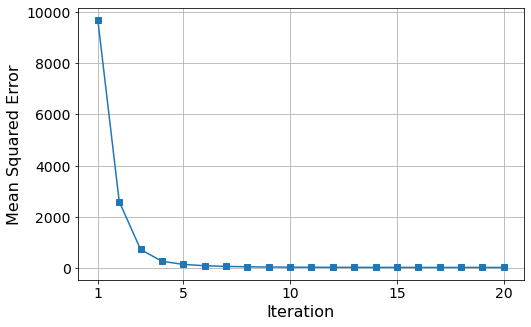

In [9]:
plot_IP_loss_evolution(return_dict,
                       start_iteration = 1,
                       reg_line = False,
                       xlabel = "Iteration",
                       save = None)

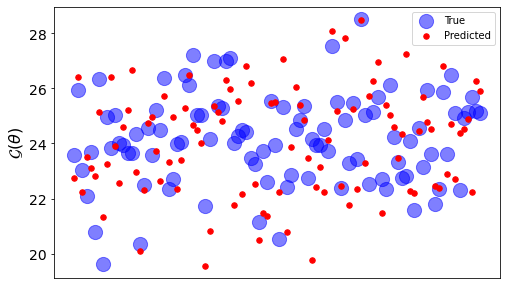

In [10]:
plot_IP_true_false(setting_dict,
                   return_dict,
                   num_points = 100,
                   x_axis = False,
                   save = None)

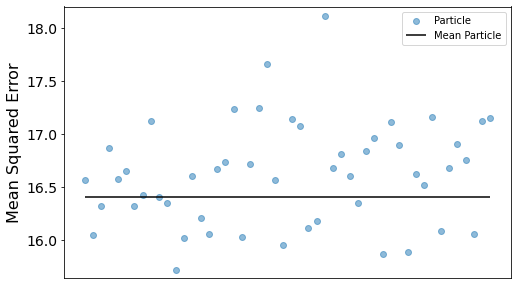

In [11]:
plot_IP_particle_loss(return_dict,
                      rel_limit_exceed = 0.005,
                      save = None)

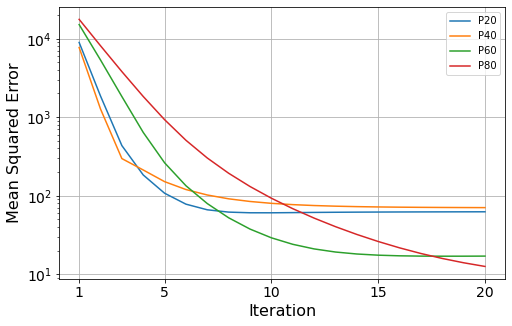

In [12]:
parameter = "particles"
parameter_list = [20, 40, 60, 80]

plot_IP_loss_evolution_many(setting_dict,
                            parameter,
                            parameter_list,
                            start_iteration = 1,
                            end_iteration = setting_dict["iterations"],
                            log = True,
                            xlabel = "Iteration",
                            analysis_dict = None,
                            linear = True,
                            save = None)

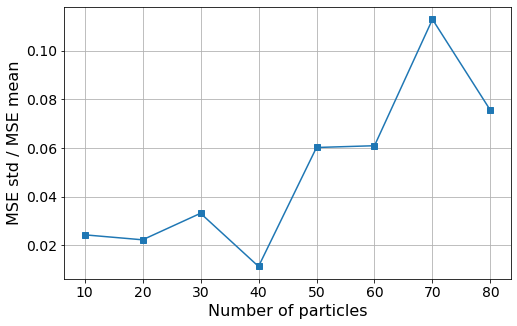

In [13]:
particle_list = [10, 20, 30, 40, 50, 60, 70, 80]

plot_IP_particle_std(setting_dict,
                     particle_list,
                     save = None)

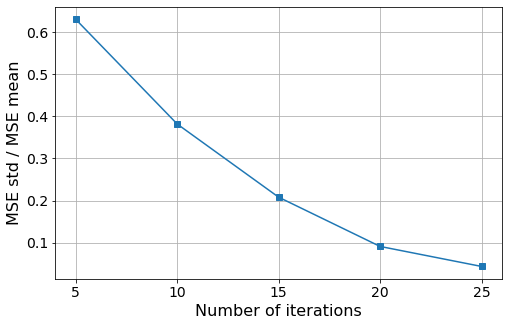

In [14]:
iteration_list = [5, 10, 15, 20, 25]

plot_IP_iteration_std(setting_dict,
                      iteration_list,
                      xlabel = "Iteration",
                      save = None)

# Nonlinear Model

## Model:
$\sin(x)=y + \eta$ with $\eta\sim\mathscr{N}(0,\Gamma)$.

In [15]:
x = np.random.uniform(low = 0,
                      high = 7,
                      size = (100, ))

In [16]:
def model_func(x):
    return np.sin(x)

In [17]:
noise = True

y, std = y_noise(model_func,
                 x, 
                 noise)

In [18]:
setting_dict = {"model_func": model_func,
                "x": x,
                "y": y,
                "particles": 50,
                "iterations": 20,
                "noise": noise,
                "std": std,
                "h_0": 2,
                "epsilon": 0.5,
                }

In [19]:
return_dict = enkf_inverse_problem(setting_dict)

final_params = return_dict["final_params"]
loss_evolution = return_dict["loss_evolution"]
loss_evolution_single_dict = return_dict["loss_evolution_single_dict"]

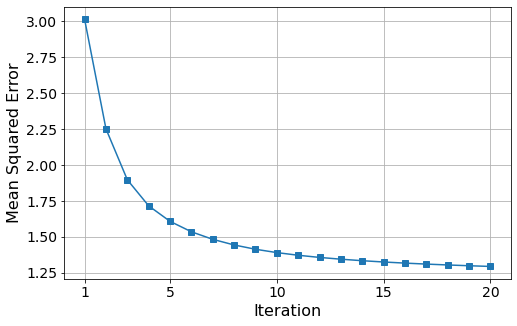

In [20]:
plot_IP_loss_evolution(return_dict,
                       start_iteration = 1,
                       reg_line = False,
                       xlabel = "Iteration",
                       save = None)

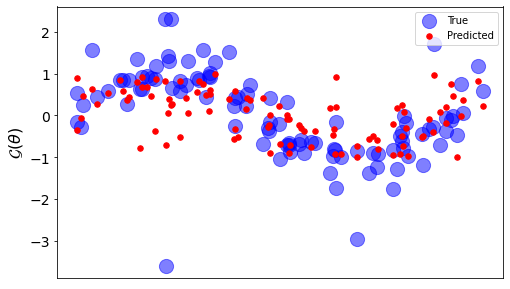

In [21]:
plot_IP_true_false(setting_dict,
                   return_dict,
                   num_points = None,
                   x_axis = True,
                   save = None)

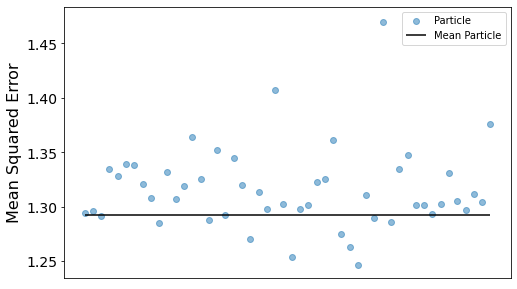

In [22]:
plot_IP_particle_loss(return_dict,
                      rel_limit_exceed = 0.01,
                      save = None)

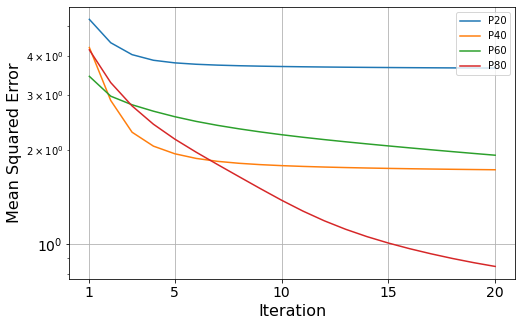

In [23]:
parameter = "particles"
parameter_list = [20, 40, 60, 80]

plot_IP_loss_evolution_many(setting_dict,
                            parameter,
                            parameter_list,
                            start_iteration = 1,
                            end_iteration = setting_dict["iterations"],
                            log = True,
                            xlabel = "Iteration",
                            analysis_dict = None,
                            linear = True,
                            save = None)

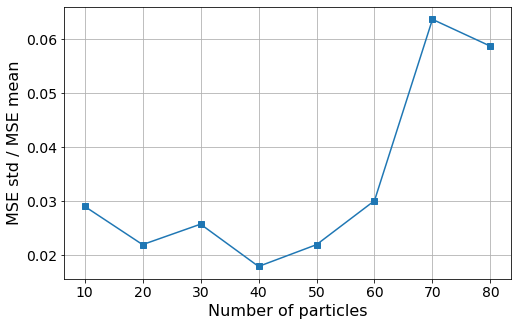

In [24]:
particle_list = [10, 20, 30, 40, 50, 60, 70, 80]

plot_IP_particle_std(setting_dict,
                     particle_list,
                     save = None)

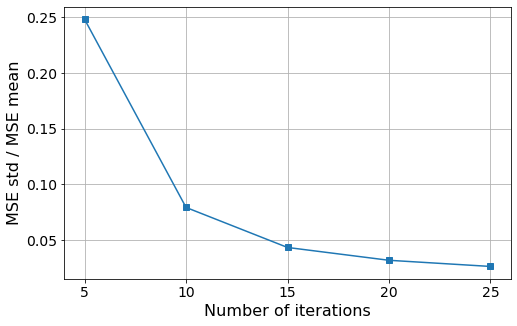

In [25]:
iteration_list = [5, 10, 15, 20, 25]

plot_IP_iteration_std(setting_dict,
                      iteration_list,
                      xlabel = "Iteration",
                      save = None)